In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Linear Regression

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/160119737010/linear-house.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


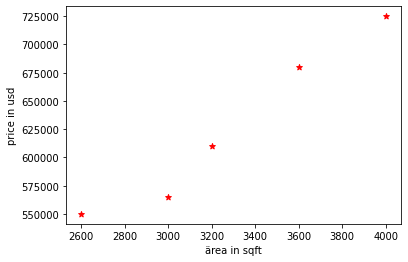

In [ ]:
%matplotlib inline
plt.xlabel('ärea in sqft')
plt.ylabel('price in usd')
plt.scatter(df.area,df.price,color='red',marker='*')

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
135.78767123*3300+180616.43835616432

628715.7534151643

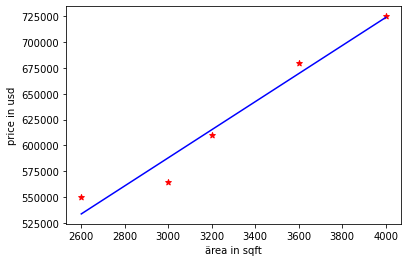

In [ ]:
%matplotlib inline
plt.xlabel('ärea in sqft')
plt.ylabel('price in usd')
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/160119737010/areas.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p1= reg.predict(df1)
p1
#for all areas you get the price values

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
df1['price']=p1
df1

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Multiple linear regression

In [ ]:
#Multiple linear regression
df2=pd.read_csv("/content/drive/MyDrive/160119737010/houseprice-multi.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df2.bedrooms.median()

3.5

In [ ]:
import math
median_brooms= math.floor(df2.bedrooms.median())
median_brooms

3

In [ ]:
df2.bedrooms=df2.bedrooms.fillna(median_brooms)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df2[['area','bedrooms','age']],df2.price)

LinearRegression()

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([444400.])

In [ ]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [ ]:
reg.intercept_

383724.99999999994

In [ ]:
(3000*137.25)+(3*-26025.)+(40*-6825.  )+383724.99999999994

444399.99999999994

Logistic Regression

In [ ]:
#logistic regression
lr=pd.read_csv("/content/drive/MyDrive/160119737010/insurance-logistic.csv")
lr

,age,bought_ins
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


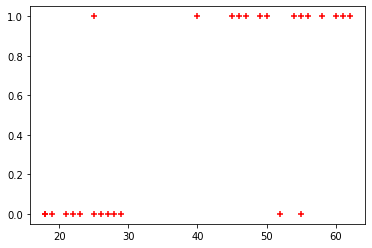

In [ ]:
plt.scatter(lr.age,lr.bought_ins,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(lr[['age']],lr.bought_ins,test_size=0.1)

In [ ]:
x_test

,age
3,52
10,18
26,23


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.predict(x_test)

array([1, 0, 0])

In [ ]:
x_test

,age
3,52
10,18
26,23


In [ ]:
model.score(x_test,y_test)

0.6666666666666666

In [ ]:
model.predict_proba(x_test)
#probabilities of buying insurace,not buying, eg: in first case 0.076812 buy insurane and 0.923188 dont buy insurance

array([[0.076812  , 0.923188  ],
       [0.94660557, 0.05339443],
       [0.8896036 , 0.1103964 ]])

Decision Trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv("/content/salaries-decisiontree.csv")

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
inputs=df.drop('salary_more_then_100k',axis='columns')
target=df['salary_more_then_100k']

In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [ ]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n=inputs.drop(['job','company','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n,target)

1.0

In [ ]:
model.predict([[2,0,1]]) #company,job,degree

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
model.predict([[2,2,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
%matplotlib inline
plt.xlabel("")